#### LPIPS(Learned Perceptual Image Patch Similarity)
- 2개 이미지의 유사도를 평가하기 위해 사용되는 지표
- 비교할 2개의 이미지 각각을 VGG Network에 넣고, 중간 layer의 feature 값들을 각각 뽑아 서로 유사한지 측정
- 사람의 인식에 기반한 유사도 측정을 시도하였음
 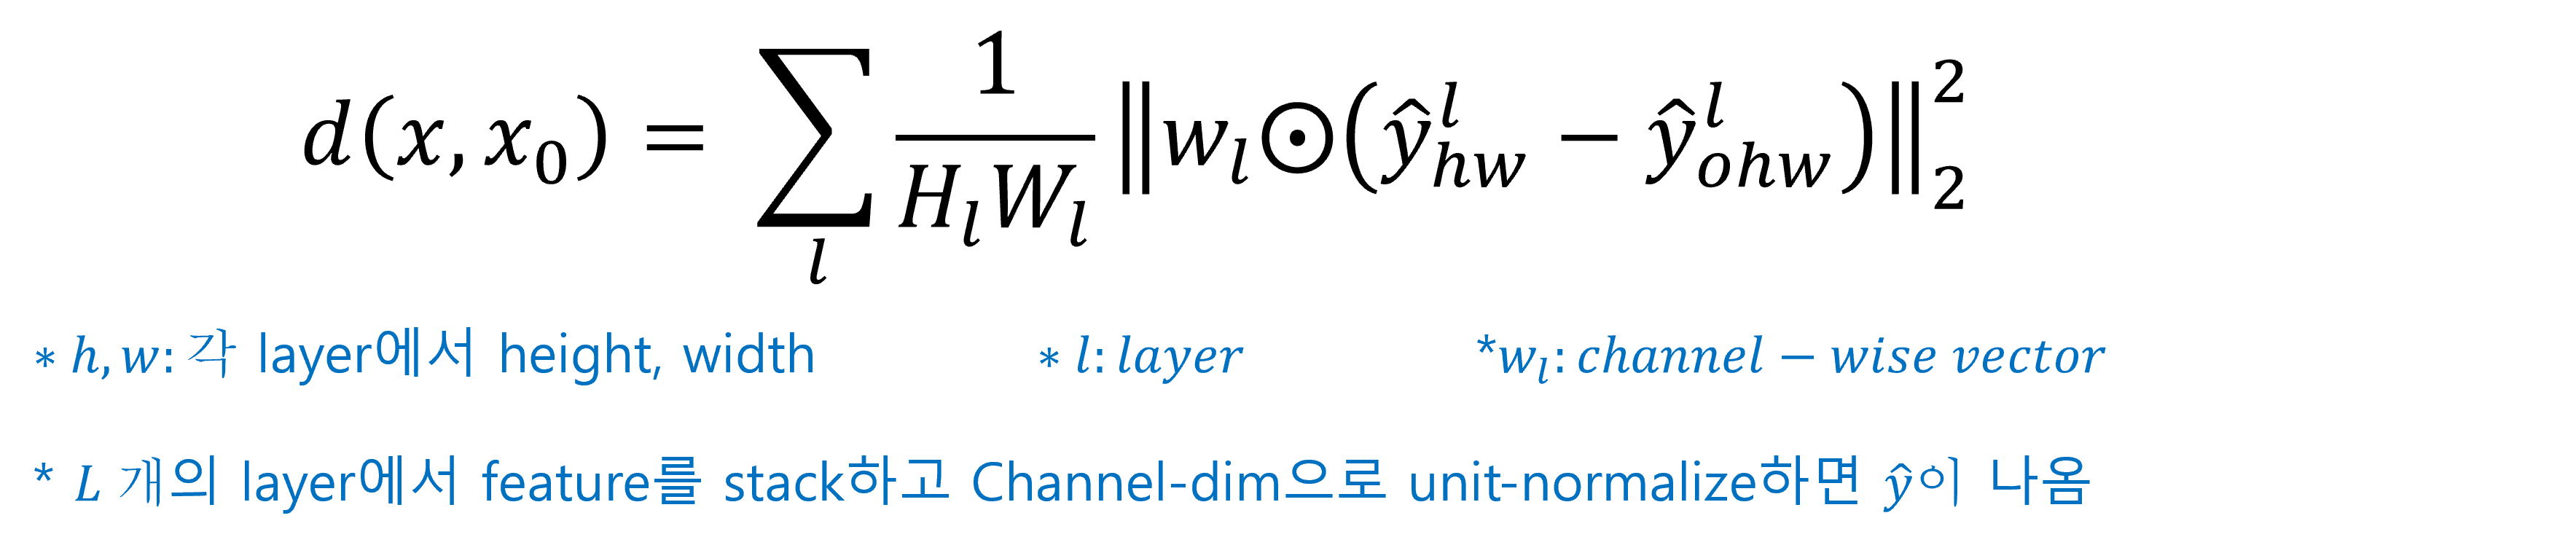

#### 사용해보기
- pip install lpips

In [1]:
import lpips
from PIL import Image
import torch
import torchvision.transforms.functional as TF
from torchvision.io import read_image, ImageReadMode
from torchvision import transforms
from PIL import Image
from model import LPIENet

c:\Users\islab\.conda\envs\mings\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop((540,960)),
    transforms.ToTensor(),
])

# 모델 설정
model = LPIENet(3, 3, [16, 32, 64], [32, 16])
model.load_state_dict(torch.load('best.pth'))
model.to(device)
img_blur = read_image('img_blur.png', mode = ImageReadMode.RGB)
img_blur = transform(img_blur).to(device)

result = model(img_blur.unsqueeze(0))
p = 1e-5
result = result.clip(0, 1 - p) # 이상치 값 clip


# result를 png이미지로 변경
result_image = TF.to_pil_image(result.squeeze().cpu())
print(result_image)
result_image.save('result_image.png')

<PIL.Image.Image image mode=RGB size=960x540 at 0x238F1334B88>


In [18]:
# lpips에 적용할 모델 선언 (alex net 또는 vgg 사용가능)
loss_fn = lpips.LPIPS(net='vgg') # vgg 사용

# lpips에 적용하기 위해 tensor형태로 이미지 불러오기
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.CenterCrop((540,960)),
        transforms.ToTensor(),
    ])
    image_tensor = transform(image).unsqueeze(0)
    return image_tensor

img = load_image('img.png')
img_blur = load_image('img_blur.png')

value = loss_fn.forward(img, img_blur)
print(f"\n Before LPIENet value is {value.item()}") #lpips 사용 시 출력이 tensor이므로 .item()을 사용하여 단일값만 출력

result_image = load_image('result_image.png')
after_value = loss_fn.forward(img, result_image)
print(f" After LPIENet value is {after_value.item()}") #

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]
Loading model from: c:\Users\islab\.conda\envs\mings\lib\site-packages\lpips\weights\v0.1\vgg.pth

 Before LPIENet value is 0.4243224859237671
 After LPIENet value is 0.3959762454032898
